<a href="https://colab.research.google.com/github/Fordalo/Data_SCIENCE_WORK/blob/main/Autoregressive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   uses linear combination of past values of the target to make a prediction
*   regression against itself
*   AR(p), p = order
*   can only be applied to stationary times series


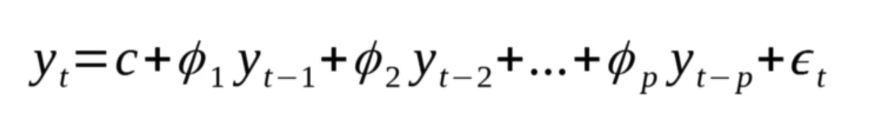





*   p = order
*   c is the constant
*   epsilon is noise
*   phi is weights



When plotting the acf of an autoregressive  model, there may be oscillation, or slow decay, thats why for autregressive, we do a partial acf plot (PACF)

In [54]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/gdrive')


%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7.5)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#SIMULATION OF AR(2) process

$ y_{t} = .33_{y_{t-1}} + .5_{y_{t-2}} $

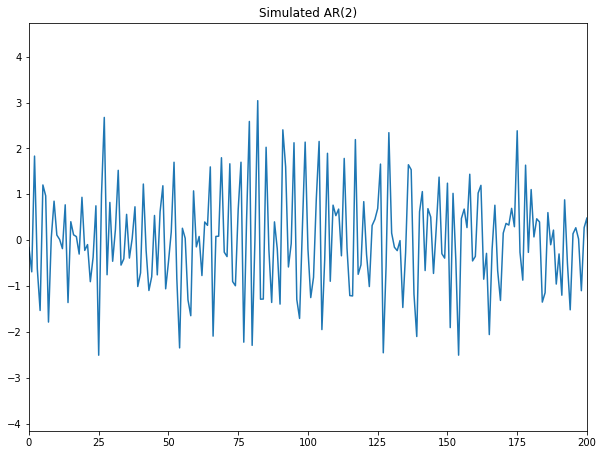

In [55]:
ar2 = np.array([1, .33, .5])
ma2 = np.array([1,0,0])

#generating samples
AR2_process = ArmaProcess(ar2, ma2).generate_sample(nsample= 1000)
plt.plot(AR2_process)
plt.title('Simulated AR(2)')
plt.xlim(0,200)
plt.show()


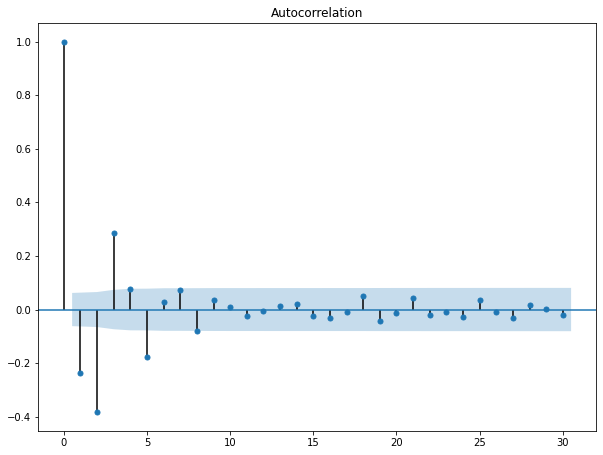

In [56]:
plot_acf(AR2_process);

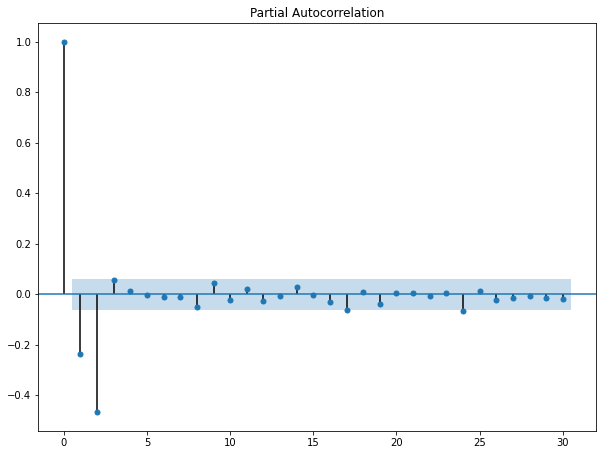

In [57]:
#notice the oscillation above
plot_pacf(AR2_process);

In [58]:

#getting coefficients back of AR model with yule walker
#notice that our rho and sigma are very similar to what we started with in this simulation
rho, sigma = yule_walker(AR2_process, 2, method = 'mle')
print(f"rho: {rho} \nsigma: {sigma}")

rho: [-0.34820299 -0.46614756] 
sigma: 1.022958755220241


## ORDER PROCESS OF AR(3)

$ y_{t} = .33_{y_{t-1}} + .5_{y_{t-2}} + .07_{y_{t-3}} $

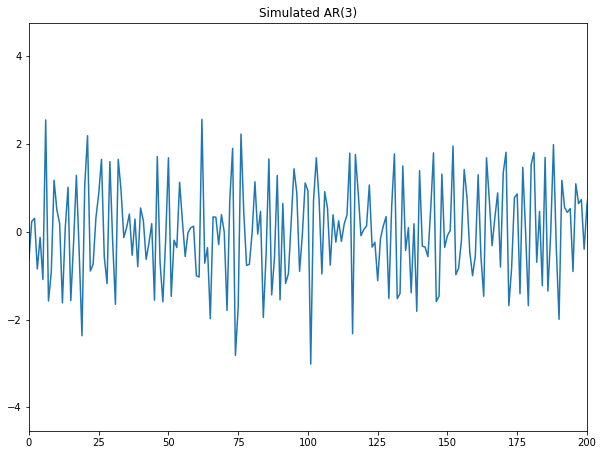

In [59]:
AR3 = np.array([1, .33, .5, .07])
MA3 = np.array([1, 0, 0, 0])

#generating samples
AR3_process = ArmaProcess(AR3, MA3).generate_sample(nsample= 1000)
plt.plot(AR3_process)
plt.title('Simulated AR(3)')
plt.xlim(0,200)
plt.show()

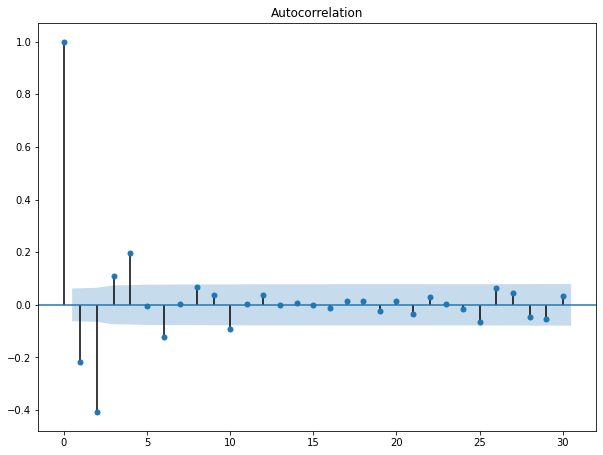

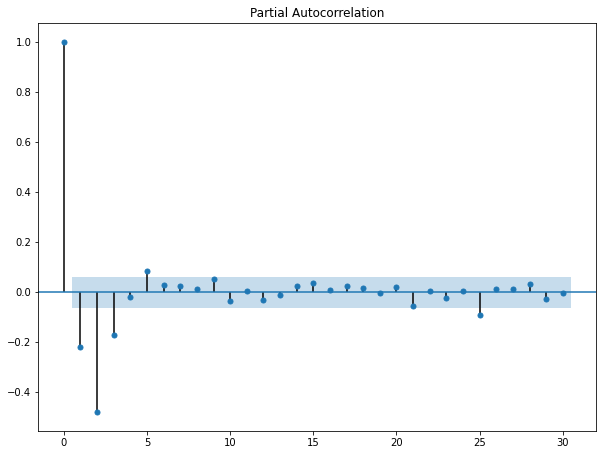

In [60]:
plot_acf(AR3_process);
plot_pacf(AR3_process);

Above, notice again that when we tried to plot the acf of a moving average model, it is not clear what our order is, also, we have oscilatting points. For the Pacf, we can clearly see that our order is 3

In [61]:
rho2, sigma2 = yule_walker(AR3_process, 3, method = 'mle')
print(f"rho: {-rho2} \nsigma: {sigma2}")

rho: [0.40424025 0.53364215 0.17085705] 
sigma: 0.9654846355813567


## mini J&J project (Quarterly Earnings Per Share)

In [62]:
JJdata = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Data Science projects/Applied Time Series/Moving Average/jj.csv')
JJdata.head(20)

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61
5,1961-04-02,0.69
6,1961-07-02,0.92
7,1961-10-01,0.55
8,1962-01-01,0.72
9,1962-04-02,0.77


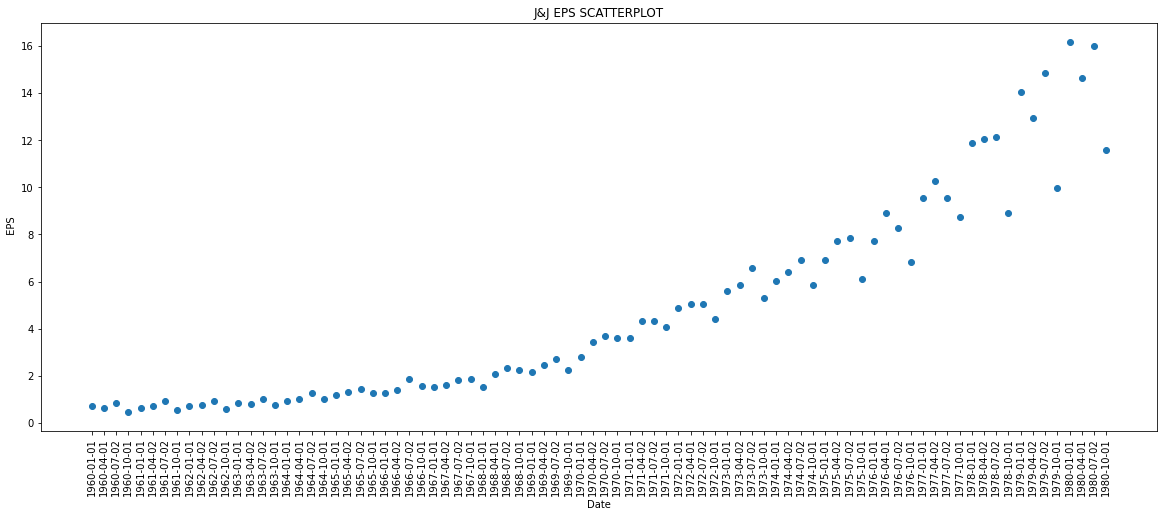

In [63]:
plt.figure(figsize = [20, 7.5])
plt.scatter(JJdata['date'], JJdata['data'])
plt.title('J&J EPS SCATTERPLOT')
plt.ylabel(' EPS')
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.show()

We can obviously see a trend, and some seasonality with our data. We need to transform it to make it stationary. We will take the log difference to make this stationary

In [64]:
JJdata['data'] = np.log(JJdata['data'])
JJdata['data'] = JJdata['data'].diff()
JJdata['data']

0          NaN
1    -0.119545
2     0.299517
3    -0.658462
4     0.326684
        ...   
79   -0.396415
80    0.483427
81   -0.099207
82    0.088033
83   -0.321971
Name: data, Length: 84, dtype: float64

When we take the log difference, we usually use the first datapoint so we need to drop it

In [65]:
JJdata = JJdata.drop(JJdata.index[0])
JJdata.head(5)

,date,data
1,1960-04-01,-0.119545
2,1960-07-02,0.299517
3,1960-10-01,-0.658462
4,1961-01-01,0.326684
5,1961-04-02,0.123233


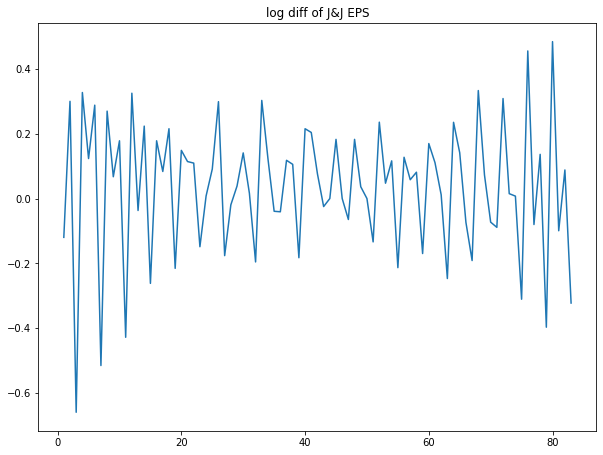

In [66]:
plt.plot(JJdata['data'])
plt.title('log diff of J&J EPS')
plt.show()

#stationarity = no trend and same variance


In [67]:
#testing statistically to see if our dataset is stationary
#we use the adfuller test to check stationarity
#when conducting, the null hypothesis is that the dataset is not stationary
#if we run and the P value is less than 0.05, then we can reject the null and assume that it is stationary

adfullerresult = adfuller(JJdata['data'])
print(f'ADF statistic: {adfullerresult[0]} \nPVALUE: {adfullerresult[1]}')

ADF statistic: -4.317043945811839 
PVALUE: 0.000414973140444062


We can confimr stationarity, now we can run models

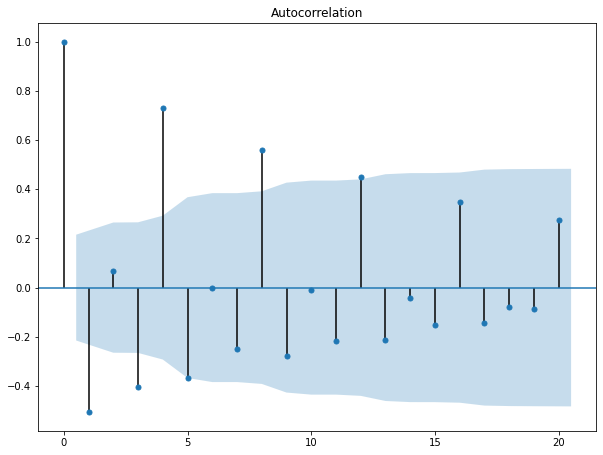

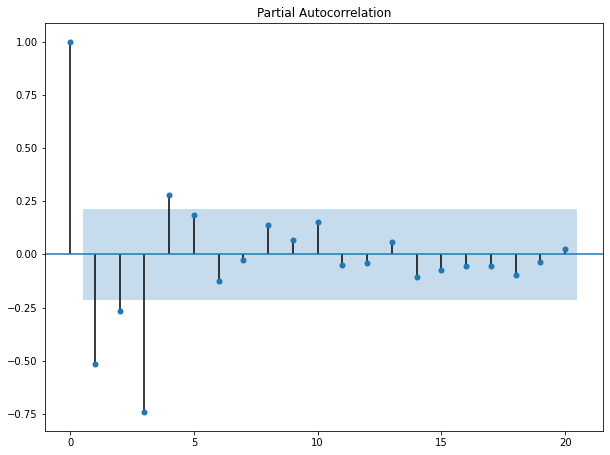

In [68]:
plot_acf(JJdata['data']);
plot_pacf(JJdata['data']);

In [69]:
#we can see that our order will be 4 based on PACF above. now lets get our coefficients using yule walker
#rho is coef, and sigma is the variance
rho3, sigma3 = yule_walker(JJdata['data'], 4)
print(f"rho: {-rho3} \nsigma: {sigma3}")

rho: [ 0.63642644  0.5364386   0.50578018 -0.27991345] 
sigma: 0.11132979178317175
